# CS470/670 Artificial intelligence

**Name:** [Rami Huu Nguyen]


**Instructions:**

In this notebook, you will be asked to write code and answer questions.  
Place all responses under the **Solution** headers.

---

This first assignment is aimed at coding a perceptron from scratch in order to learn how this
simple but powerful linear binary classifier works. Hereafter we import some useful libraries and set the random seed for reproducibility.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SEED = 0
np.random.seed(SEED)

## The perceptron

The perceptron is the simplest form of a neural network used for the classification of data said to be linearly separable (i.e., data that lie on opposite sides of a hyperplane). It consists of a linear combination of the input features, followed by a hard limiter like the heaviside function or the sign function defined as:
$$
\begin{equation*}
    \text{Heaviside}(s) = \begin{cases} 1 & \text{if } s \geq 0 \\ 0 & \text{if } s < 0 \end{cases}
\end{equation*}
$$
or, using the Iverson bracket notation:
$$
\begin{equation*}
    \text{Heaviside}(s) = [s \geq 0]
\end{equation*}
$$

<p align="center">
  <img src="https://www.intmath.com/laplace-transformation/svg/svgphp-unit-step-functions-definition-1a-s0.svg" alt="Image description" />
</p>

As a consequence we can formalize the perceptron predictor in the following way.

Let $x$ be the object we want to classify and $\boldsymbol{f}(x)$ be the feature vector in $\mathbb{R}^N$. This means that $\boldsymbol{f}$ *extracts* the features from the object $x$, i.e. $\boldsymbol{f}(x)$ is the so-called *feature extractor*.
Moreover, let $\boldsymbol{w} \in \mathbb{R}^N$ be the synaptic weights vector, $b \in \mathbb{R}$ the externally applied bias term and $[s \geq 0]$ the hard limiter function. The perceptron predictor is defined as:
$$
\begin{equation*}
    \tilde{y} = [\boldsymbol{w}^\top \boldsymbol{f}(x) + b \geq 0]
\end{equation*}
$$
Often, we will include the bias term into the weights vector by adding a constant 1 to the feature vector $\boldsymbol{f}(x)$, so that the perceptron predictor becomes:
$$
\begin{equation*}
    \tilde{y} = [\boldsymbol{w}^\top \boldsymbol{f}(x) \geq 0]
\end{equation*}
$$

The goal is to classify correctly the input data in the classes $\mathcal{C}_1$ and $\mathcal{C}_2$.

The update rule for the perceptron is:
$$
    \boldsymbol{w} \leftarrow \boldsymbol{w}
$$
if the predicted label is correct, otherwise:
$$
\begin{equation*}
    \boldsymbol{w} \gets \begin{cases} \boldsymbol{w} - \boldsymbol{f}(x) \quad \text{ if } \boldsymbol{w}^\top \boldsymbol{f}(x) \geq 0
    \\ \boldsymbol{w} + \boldsymbol{f}(x) \quad \text{ if } \boldsymbol{w}^\top \boldsymbol{f}(x) < 0 \end{cases}
\end{equation*}
$$

One can rewrite the update rule more elengantly in the following way:
$$
\begin{equation*}
    \boldsymbol{w} \gets \boldsymbol{w} + (y - \tilde{y}) \boldsymbol{f}(x)
\end{equation*}
$$

where $y$ is the true label, i.e. the desired output of the perceptron. From now on we will compact the notation by denoting $\boldsymbol{f} = \boldsymbol{f}(x)$. 

The first task is to implement the perceptron algorithm in Python. Hereafter you have a template for the class `Perceptron`. You have to implement the methods `train` and `predict`.
- the method `train` should implement the perceptron learning algorithm and take as input the training dataset. Then process all the pairs $(\boldsymbol{f}, y)$ once updating the weights accordingly
- the method `predict` should take as input a data point `f` and return the predicted label

In [2]:
class Perceptron:
    def __init__(self, n_features):
        # You can either include the bias term in the weights vector or not
        # but consider adapting the predict method accordingly
        self.w = np.zeros(n_features)
        self.b = 0

    def predict(self, f):
        s = np.dot(self.w, f) + self.b
        return 1 if s>=0 else -1

    def train(self, F, y):
        raise NotImplementedError

**Solution**

In [3]:
# TODO

class Perceptron:
    def __init__(self, n_features):
        # You can either include the bias term in the weights vector or not
        # but consider adapting the predict method accordingly
        self.w = np.zeros(n_features)
        self.b = 0

    def predict(self, f):
        predict = np.dot (self.w, f) + self.b
        if predict >=0:
            return 1
        else:
            return -1
    
    def train(self, F, y, epochs=1):
        for _ in range(epochs):
            for i in range(len(F)):    
                f = F[i]
                y_true = y[i]
                y_pred = self.predict(f)
                
                if y_true != y_pred:
                    self.w += y_true * f
                    self.b += y_true

In [4]:
F = np.array([[2, 3], [1, 1], [-2, -1], [-3, -2]])

y = np.array([1,1,-1,-1])

model = Perceptron(n_features=2)

model.train(F, y, epochs=10)

print("Weight", model.w)
print("Bias", model.b)
print("Prediction for [1,2]:", model.predict(np.array([1,2])))


Weight [2. 1.]
Bias -1
Prediction for [1,2]: 1


## Exercise

### 1.1 Synthetic dataset generation

We will generate a dataset $D = \{ \boldsymbol{f}_n, y_n \}_{n=1}^{N=200}$ where $\boldsymbol{f}_n \in \mathbb{R}^2$ and $y_n \in \{0, 1\}$.
The dataset will be generated in the following way:
$$\boldsymbol{f}_n \sim \begin{cases}
\mathcal{N}\left(\begin{pmatrix}1 \\ 0\end{pmatrix}, \sigma^2 \mathbb{I}_2 \right) & \text{if } y_n = 1 \\
\mathcal{N}\left(\begin{pmatrix}-1 \\ 0\end{pmatrix}, \sigma^2 \mathbb{I}_2 \right) & \text{if } y_n = 0
\end{cases}
$$

The function `generate_dataset` does exactly this and you do not have to modify it.

In [5]:
def generate_dataset(
    n_samples = 200,
    sigma = 1,
    mean_positive = np.array([1, 0]),
    mean_negative = np.array([-1, 0]),
):
    # Generate covariance matrix
    covariance_matrix = sigma**2 * np.eye(2)

    # Generate labels
    y = np.random.choice([0, 1], size=n_samples)

    # Generate data points based on labels
    F = np.array([
        np.random.multivariate_normal(mean_positive, covariance_matrix) if label == 1 
        else np.random.multivariate_normal(mean_negative, covariance_matrix) 
        for label in y
    ])

    return F, y

An example of a generated dataset is shown below.

### 1.2 Decision boundary

The decision boundary of the perceptron is the hyperplane defined by the equation $\boldsymbol{w}^\top \boldsymbol{f} = 0$ that splits (or tries to) the data points in two regions.
When working with two-dimensional data, the decision boundary is an easily visualizable line.

Generate a random dataset with $N=200$ samples and $\sigma=0.5$, then plot the data points and the decision boundary of the perceptron.

**Solution**

In [6]:
# TODO

Sigma = 0.5

def generate_dataset(
    n_samples=200,
    sigma=Sigma,
    mean_positive=np.array([1, 0]),
    mean_negative=np.array([-1, 0]),
):
    covariance_matrix = sigma**2 * np.eye(2)
    y = np.random.choice([0, 1], size=n_samples)
    F = np.array([
        np.random.multivariate_normal(mean_positive, covariance_matrix) if label == 1
        else np.random.multivariate_normal(mean_negative, covariance_matrix)
        for label in y
    ])
    return F, y




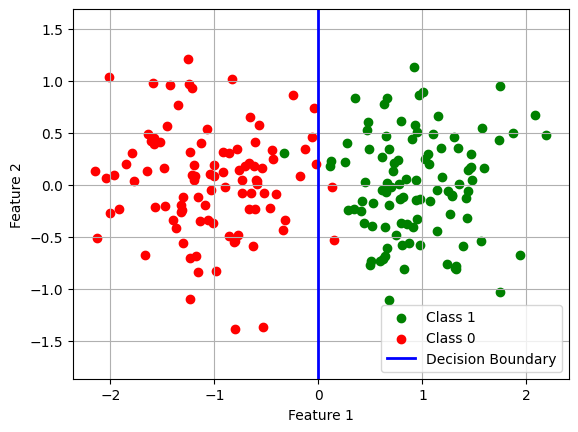

In [7]:
F, y = generate_dataset()

p = Perceptron(n_features=2)

#Plot 

plt.scatter(F[y==1,0], F[y==1,1], color='green', label='Class 1')

plt.scatter(F[y==0,0], F[y==0,1], color='red', label='Class 0')

w = p.w  # Get the learned weights

x_min, x_max = F[:, 0].min() - Sigma, F[:, 0].max() + Sigma

x_boundary = np.linspace(x_min, x_max, 100)

if w[1] != 0:
    y_boundary = -(w[0] / w[1]) * x_boundary
    plt.plot(x_boundary, y_boundary, 'b-', linewidth=2, label='Decision Boundary')
else:
    # Vertical line if w[1] = 0
    plt.axvline(x=0, color='b', linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### 1.4 Error analysis

Now we focus on the error analysis of the predictions of the perceptron.

#### 1.4.1 Variance in the inputs

Consider three different values of $\sigma = \{0.04, 0.5, 0.75\}$. For each value of $\sigma$:
1. Run the perceptron over 50 randomly generated datasets
2. For each of these datasets, train the perceptron, make it predict the labels of the same data points and compute the mean of the errors using as error function $e(y, \tilde{y}) = \left[ y \neq \tilde{y} \right]$. The mean of the errors can be estimated with the `np.mean` function.
3. For each of the sigma values, print the mean and the standard deviation of the errors. Then plot the distribution of the errors for each value of $\sigma$. What happens when $\sigma$ increases? What is the reason for this?

**Solution**

In [8]:
# TODO

sigmas = [0.04, 0.5, 0.75]
results = {}

for sigma in sigmas:
    errors = []
    
    for each in range(50):

        # Generate dataset
        F, y = generate_dataset(sigma=sigma)

        y_train = np.where(y == 0, -1, 1)
        
        # Train perceptron
        p = Perceptron(n_features=2)
        for i in range(len(F)):
            p.predict(F[i])
            p.train(F, y_train, epochs=1)

        # Predict on training data
        y_pred = np.array([p.predict(F[i]) for i in range(len(F))])
        
        # Calculate error rate
        error = np.mean(y != y_pred)
        
        errors.append(error)
    
    results[sigma] = errors
    
    print(f"σ = {sigma}: Mean Error = {np.mean(errors):.4f}, Std = {np.std(errors):.4f}")


σ = 0.04: Mean Error = 0.5056, Std = 0.0376
σ = 0.5: Mean Error = 0.5086, Std = 0.0347
σ = 0.75: Mean Error = 0.5624, Std = 0.0691


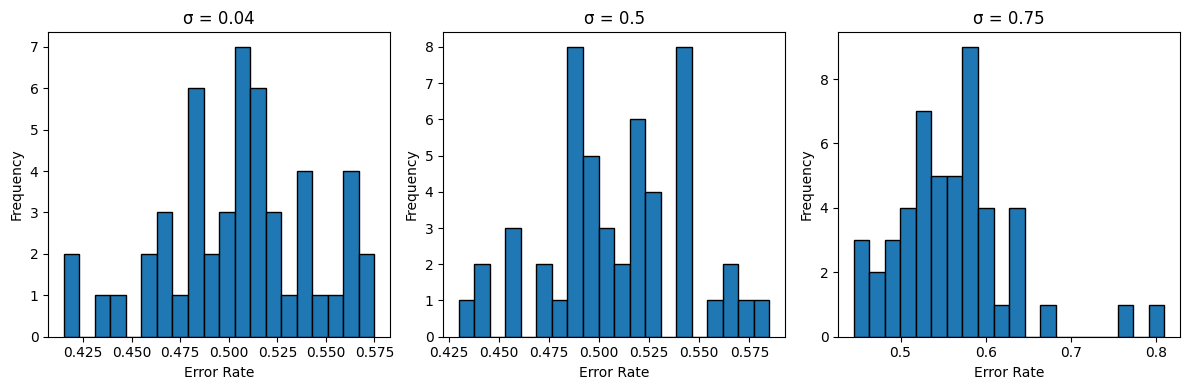

In [9]:
# Plot distributions
plt.figure(figsize=(12, 4))
for i, sigma in enumerate(sigmas):
    plt.subplot(1, 3, i+1)
    plt.hist(results[sigma], bins=20, edgecolor='black')
    plt.title(f'σ = {sigma}')
    plt.xlabel('Error Rate')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most bars are around 0.48–0.52, meaning the model’s error rate is roughly 50% most of the time. At σ = 0.04, the data is quite clean (little noise).

The error rate mostly falls between 0.48 and 0.55, but it’s a bit more spread out than at σ = 0.04.  The peak (most frequent errors) is around 0.52, meaning many trials gave about 52% wrong predictions. When σ = 0.5, the dataset becomes noisier.

The error rates are higher, mostly between 0.5 and 0.65, with some trials reaching 0.6. When σ = 0.75, the dataset is very noisy.

When σ increases → data gets noisier → classes overlap → perceptron struggles → error goes up.

### 1.4.2 Variance in the labels
Generate one more dataset with $\sigma = 0.15$. To make our dataset noisier we consider the possibility of flipping some labels. Consider these label flipping probabilities: $p = \{0.05, 0.15, 0.25\}$.
Repeat the previous experiment keeping the newly generateed dataset fixed, but flipping the labels with the given probabilities.
Print the errors and plot the distribution of the error statistic. What can we say about the error distribution when $p$ increases?

*Hint*: write a function `flip_labels` that takes as input the labels and the probability $p$ and returns the flipped labels and then use it in the experiment.

**Solution**

In [10]:
# TODO

# Function to flip labels with probability p
def flip_labels(y, p):
    
    y_flipped = y.copy()

    n = len(y)

    # Generate random values and flip labels where random value < p

    flip_mask = np.random.rand(n) < p
    
    y_flipped[flip_mask] = 1 - y_flipped[flip_mask]  # Flip 0→1 and 1→0
    
    return y_flipped


In [11]:
F_fixed, y_fixed = generate_dataset(n_samples=200, sigma=0.15)

flip_probs = [0.05, 0.15, 0.25]

results = {}

for p in flip_probs:
    errors = []
    
    for trial in range(50):
        y_noisy = flip_labels(y_fixed, p)
        
        y_train = np.where(y_noisy == 0, -1, 1)
        
        perceptron = Perceptron(n_features=2)
        perceptron.train(F_fixed, y_train, epochs=1)
        
        y_pred = np.array([perceptron.predict(F_fixed[i]) for i in range(len(F_fixed))])
        
        y_pred_binary = np.where(y_pred == -1, 0, 1)
        
        error = np.mean(y_fixed != y_pred_binary)
        
        errors.append(error)
    
    results[p] = errors

    print(f"p = {p}: Mean Error = {np.mean(errors):.4f}, Std = {np.std(errors):.4f}")

p = 0.05: Mean Error = 0.0222, Std = 0.1006
p = 0.15: Mean Error = 0.1448, Std = 0.2395
p = 0.25: Mean Error = 0.2736, Std = 0.3131


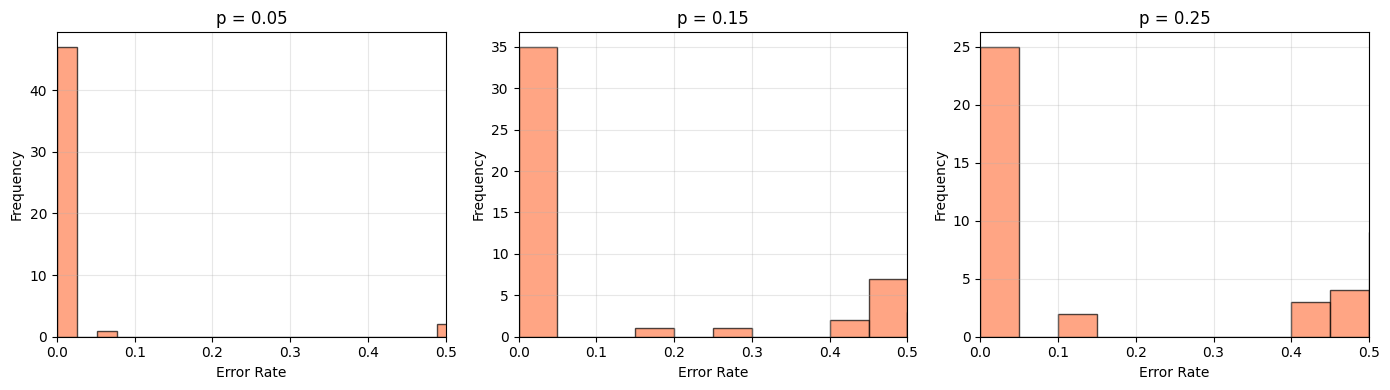

In [12]:
plt.figure(figsize=(14, 4))

for i, p in enumerate(flip_probs):
    
    plt.subplot(1, 3, i+1)
    plt.hist(results[p], bins=20, edgecolor='black', alpha=0.7, color='coral')
    plt.title(f'p = {p}')
    plt.xlabel('Error Rate')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 0.5)  # Set consistent x-axis
plt.tight_layout()
plt.show()

p=0.05, most error rates are very little — the perceptron predicts correctly most of the time.

p=0.15, errors happen more often — a few trials show higher erroes as some training labels were flipped.

p=0.25, the errors increase even more and vary widely — some runs perform okay, but many have large errors.

Once p increases, the model becomes less reliable and more unstable, since noisy labels confuse the learning process.